In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
from sklearn.preprocessing import MinMaxScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA
from sklearn.decomposition import IncrementalPCA
from sklearn import metrics
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score,precision_score, recall_score
pd.set_option('display.max_rows', 500)
pd.set_option('display.max_columns', 500)
pd.set_option('display.width', 1000)
import os

# hide warnings
import warnings
warnings.filterwarnings('ignore')

In [2]:
#loading credit data
cdata = pd.read_csv('Credit Bureau data.csv')
cdata.head(10)

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag
0,954457215,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0
1,432830445,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0
2,941387308,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0
3,392161677,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0
4,182011211,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0
5,312196805,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0
6,532217204,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0
7,74788849,0,0,0,0,0,0,13.0,1.0,1,0,0,0,0,1.0,3004790.0,3,0,0.0
8,782743811,0,0,0,0,0,1,9.0,0.0,0,0,0,0,0,1.0,3007428.0,2,0,0.0
9,96964957,0,0,0,0,0,0,6.0,1.0,1,0,0,0,0,0.0,170860.0,1,1,0.0


In [3]:
#loading demographic data
ddata = pd.read_csv('Demographic data.csv')
ddata.head(10)

,Application ID,Age,Gender,Marital Status (at the time of application),No of dependents,Income,Education,Profession,Type of residence,No of months in current residence,No of months in current company,Performance Tag
0,954457215,48,F,Married,2.0,40.0,Bachelor,SAL,Rented,113,56,0.0
1,432830445,31,M,Married,4.0,55.0,Professional,SE_PROF,Rented,112,46,0.0
2,941387308,32,M,Single,2.0,46.0,Bachelor,SE_PROF,Rented,104,49,0.0
3,392161677,43,M,Married,1.0,53.0,Bachelor,SE,Rented,94,53,0.0
4,182011211,35,F,Married,5.0,44.0,Professional,SAL,Rented,112,43,0.0
5,312196805,20,M,Married,1.0,39.0,Bachelor,SAL,NaN,116,52,0.0
6,532217204,42,M,Married,2.0,55.0,Professional,SAL,Rented,104,41,0.0
7,74788849,34,M,Married,2.0,49.0,Masters,SE_PROF,Rented,108,40,0.0
8,782743811,30,M,Married,3.0,48.0,Phd,SAL,Rented,115,58,0.0
9,96964957,22,M,Single,1.0,38.0,Bachelor,SE_PROF,Rented,111,57,0.0


In [4]:
#Fucntion to perform standard checks for a dataframe
def check_basic(df):
    print("Shape of the Data frame:")
    print(df.shape)
    print("\n")
    print("Basic info of the Data frame:")
    print(df.info())
    print("\n")
    print("Null percentages:")
    print(round(df.isnull().sum()/len(df)*100,2).astype(str)+' %')
    print("\n")
    print("Describe with percentiles:")
    describe=df.describe(percentiles=[.25, .5, .75, .90, .95, .99])
    display(HTML(describe.to_html()))

In [5]:
#merging both data
data = pd.merge(cdata,ddata,on='Application ID')

In [6]:
#basic check of data
check_basic(data)

Shape of the Data frame:
(71301, 30)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 71301 entries, 0 to 71300
Data columns (total 30 columns):
Application ID                                                     71301 non-null int64
No of times 90 DPD or worse in last 6 months                       71301 non-null int64
No of times 60 DPD or worse in last 6 months                       71301 non-null int64
No of times 30 DPD or worse in last 6 months                       71301 non-null int64
No of times 90 DPD or worse in last 12 months                      71301 non-null int64
No of times 60 DPD or worse in last 12 months                      71301 non-null int64
No of times 30 DPD or worse in last 12 months                      71301 non-null int64
Avgas CC Utilization in last 12 months                             70243 non-null float64
No of trades opened in last 6 months                               71300 non-null float64
No of trades opened in las

,Application ID,No of times 90 DPD or worse in last 6 months,No of times 60 DPD or worse in last 6 months,No of times 30 DPD or worse in last 6 months,No of times 90 DPD or worse in last 12 months,No of times 60 DPD or worse in last 12 months,No of times 30 DPD or worse in last 12 months,Avgas CC Utilization in last 12 months,No of trades opened in last 6 months,No of trades opened in last 12 months,No of PL trades opened in last 6 months,No of PL trades opened in last 12 months,No of Inquiries in last 6 months (excluding home & auto loans),No of Inquiries in last 12 months (excluding home & auto loans),Presence of open home loan,Outstanding Balance,Total No of Trades,Presence of open auto loan,Performance Tag_x,Age,No of dependents,Income,No of months in current residence,No of months in current company,Performance Tag_y
count,7.130100e+04,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,70243.000000,71300.000000,71301.000000,71301.000000,71301.000000,71301.000000,71301.000000,71029.000000,7.102900e+04,71301.000000,71301.000000,69876.000000,71301.000000,71298.000000,71301.000000,71301.000000,71301.000000,69876.000000
mean,4.989767e+08,0.270319,0.430555,0.577243,0.450358,0.655517,0.800957,29.698504,2.297980,5.826721,1.206841,2.397414,1.763510,3.535210,0.256402,1.249092e+06,8.186379,0.084627,0.042203,44.942694,2.865256,27.194450,34.564985,33.958780,0.042203
std,2.885844e+08,0.534161,0.825330,1.074450,0.808402,1.089532,1.331953,29.534724,2.070136,5.064964,1.352902,2.420039,1.971232,3.582094,0.436650,1.278846e+06,7.090555,0.278328,0.201054,9.939530,1.382308,15.514663,36.760727,20.411457,0.201054
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483824e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115220e+05,3.000000,0.000000,0.000000,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975977e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749850e+05,6.000000,0.000000,0.000000,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.496040e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920753e+06,10.000000,0.000000,0.000000,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
90%,8.994641e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,73.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.275806e+06,20.000000,0.000000,0.000000,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.492920e+08,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,103.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.645888e+06,25.000000,1.000000,0.000000,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895329e+08,2.000000,3.000000,5.000000,3.000000,5.000000,6.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.249691e+06,31.000000,1.000000,1.000000,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [7]:
#Removing space from column names
ddata.columns = ddata.columns.str.replace(' ','')
cdata.columns = cdata.columns.str.replace(' ','')
data.columns = data.columns.str.replace(' ','')

In [8]:
#basic check for demographic data
check_basic(ddata)

Shape of the Data frame:
(71295, 12)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 12 columns):
ApplicationID                            71295 non-null int64
Age                                      71295 non-null int64
Gender                                   71293 non-null object
MaritalStatus(atthetimeofapplication)    71289 non-null object
Noofdependents                           71292 non-null float64
Income                                   71295 non-null float64
Education                                71176 non-null object
Profession                               71281 non-null object
Typeofresidence                          71287 non-null object
Noofmonthsincurrentresidence             71295 non-null int64
Noofmonthsincurrentcompany               71295 non-null int64
PerformanceTag                           69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.5+ MB
None


,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,7.129500e+04,71295.000000,71292.000000,71295.000000,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,44.943039,2.865188,27.195224,34.563420,33.958244,0.042193
std,2.885905e+08,9.939211,1.382319,15.514626,36.759758,20.410824,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.483719e+08,37.000000,2.000000,14.000000,6.000000,16.000000,0.000000
50%,4.975698e+08,45.000000,3.000000,27.000000,11.000000,34.000000,0.000000
75%,7.495868e+08,53.000000,4.000000,40.000000,60.000000,51.000000,0.000000
90%,8.994646e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.492921e+08,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895336e+08,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [9]:
#demographic data cleaning - removing rows for which performance tag is null since its labelled column
demodata = ddata.dropna(axis=0, subset=['PerformanceTag'])


In [10]:
#check basic after dropping nulls in performance tag
check_basic(demodata)

Shape of the Data frame:
(69870, 12)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 12 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69752 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
dtypes: float64(3), int64(4), object(5)
memory usage: 6.9+ MB
None


,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.995578,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.930036,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,-3.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,62.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,65.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [11]:
#eda on age 
demodata[demodata['Age']<15].shape


(20, 12)

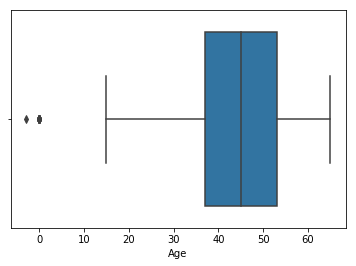

In [12]:
#boxplot for age
sns.boxplot(x=demodata['Age'])

In [13]:
#replace age less than 15 with 16 and age greater than 60 with 60
demodata['Age'] = np.where(demodata['Age']<15,16,demodata['Age'])
demodata['Age'] = np.where(demodata['Age']>60,60,demodata['Age'])

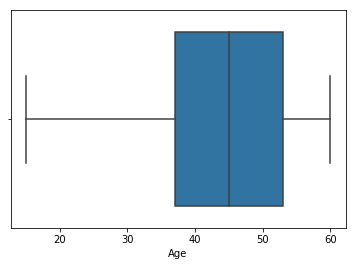

In [14]:
#boxplot after handling age
sns.boxplot(x=demodata['Age'])

In [15]:
#dividing age into buckets
demodata['AgeSegment'] = np.where(((demodata['Age'] >=16) & (demodata['Age'] <= 25)), 'Youth', 
                                       np.where(((demodata['Age'] >=26) & (demodata['Age'] <= 35)), 'MiddleAge', 
                                               np.where(((demodata['Age'] >=36) & (demodata['Age'] <= 50)), 'PostMiddleAge', 'Retired')))

In [16]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69752 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [17]:
#Handling education
demodata['Education'].unique()

array(['Bachelor', 'Professional', 'Masters', 'Phd', 'Others', nan],
      dtype=object)

In [18]:
#Education unique values count
demodata.Education.value_counts()

Professional    24386
Masters         23481
Bachelor        17302
Phd              4464
Others            119
Name: Education, dtype: int64

In [19]:
#filling null values in education with professional
demodata['Education'].fillna(value='Professional',inplace=True)

In [20]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69857 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [21]:
#handling null values for profession
demodata['Profession'].value_counts()

SAL        39674
SE_PROF    16256
SE         13927
Name: Profession, dtype: int64

In [22]:
#filling null values in profession with sal
demodata['Profession'].fillna(value='SAL', inplace=True)

In [23]:
#basic check
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69864 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69870 non-null object
Typeofresidence                          69862 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


In [24]:
#Marital status
demodata['MaritalStatus(atthetimeofapplication)'].value_counts()

Married    59547
Single     10317
Name: MaritalStatus(atthetimeofapplication), dtype: int64

In [25]:
#filling null values in marital status with Married
demodata['MaritalStatus(atthetimeofapplication)'].fillna(value='Married', inplace=True)

In [26]:
#Handling null value sin type of residence
demodata['Typeofresidence'].value_counts()

Rented                 52280
Owned                  14003
Living with Parents     1778
Company provided        1603
Others                   198
Name: Typeofresidence, dtype: int64

In [27]:
#Filling null in typeof residence with rented 
demodata['Typeofresidence'].fillna(value='Rented', inplace=True)

In [28]:
#Check basic
check_basic(demodata)

Shape of the Data frame:
(69870, 13)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 13 columns):
ApplicationID                            69870 non-null int64
Age                                      69870 non-null int64
Gender                                   69868 non-null object
MaritalStatus(atthetimeofapplication)    69870 non-null object
Noofdependents                           69867 non-null float64
Income                                   69870 non-null float64
Education                                69870 non-null object
Profession                               69870 non-null object
Typeofresidence                          69870 non-null object
Noofmonthsincurrentresidence             69870 non-null int64
Noofmonthsincurrentcompany               69870 non-null int64
PerformanceTag                           69870 non-null float64
AgeSegment                               69870 non-null object
dtyp

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.408451,34.608144,34.199184,0.042193
std,2.885519e+08,9.557157,1.385554,15.476003,36.845655,20.350225,0.201030
min,1.004500e+05,15.000000,1.000000,-0.500000,6.000000,3.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000


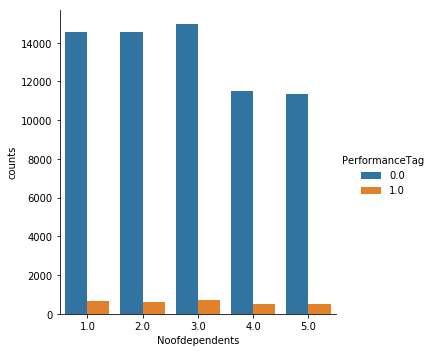

In [29]:
#ploting
#Plotting Noofdependents purpose against count 
grpby_Noofdependents = demodata.groupby(['Noofdependents','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Noofdependents', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Noofdependents)

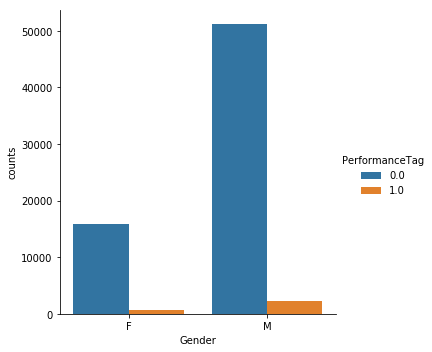

In [30]:
#Plotting Noofdependents purpose against count 
grpby_Gender = demodata.groupby(['Gender','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Gender', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Gender)

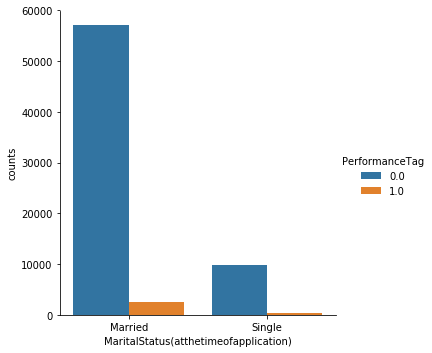

In [31]:
#Plotting Noofdependents purpose against count 
grpby_MaritalStatus = demodata.groupby(['MaritalStatus(atthetimeofapplication)','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'MaritalStatus(atthetimeofapplication)', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_MaritalStatus)

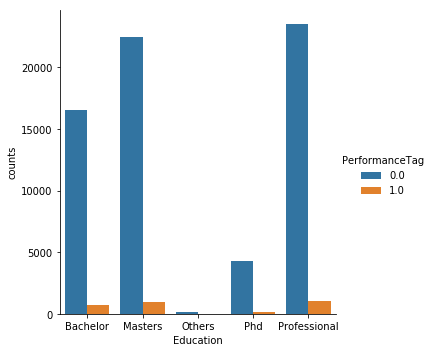

In [32]:
#Plotting Noofdependents purpose against count 
grpby_Education = demodata.groupby(['Education','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Education', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Education)

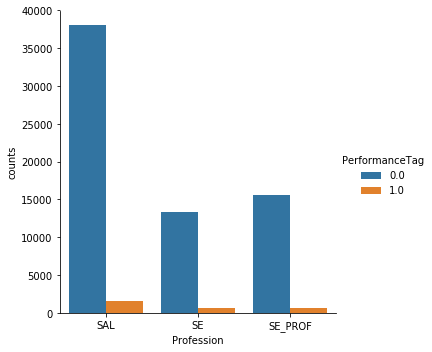

In [33]:
#Plotting Noofdependents purpose against count 
grpby_Profession = demodata.groupby(['Profession','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Profession', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Profession)

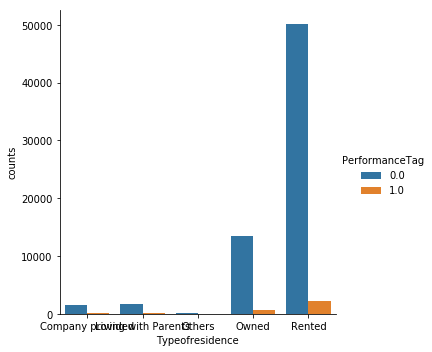

In [34]:
#Plotting Noofdependents purpose against count 
grpby_Typeofresidence = demodata.groupby(['Typeofresidence','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Typeofresidence', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Typeofresidence)

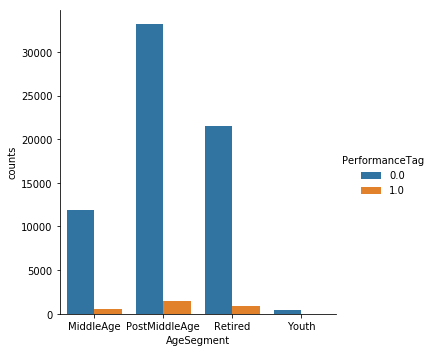

In [35]:
#Plotting Noofdependents purpose against count 
grpby_AgeSegment = demodata.groupby(['AgeSegment','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'AgeSegment', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_AgeSegment)

In [36]:
demodata.columns

Index(['ApplicationID', 'Age', 'Gender', 'MaritalStatus(atthetimeofapplication)', 'Noofdependents', 'Income', 'Education', 'Profession', 'Typeofresidence', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'AgeSegment'], dtype='object')

In [37]:
#Numeric variables
demodata_num = demodata[['Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany']]
demodata_num.corr()

,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany
Age,1.000000,0.169886,0.064425,-0.069262,-0.025241
Noofdependents,0.169886,1.000000,0.027497,-0.005277,-0.006451
Income,0.064425,0.027497,1.000000,-0.093479,-0.097561
Noofmonthsincurrentresidence,-0.069262,-0.005277,-0.093479,1.000000,-0.075198
Noofmonthsincurrentcompany,-0.025241,-0.006451,-0.097561,-0.075198,1.000000


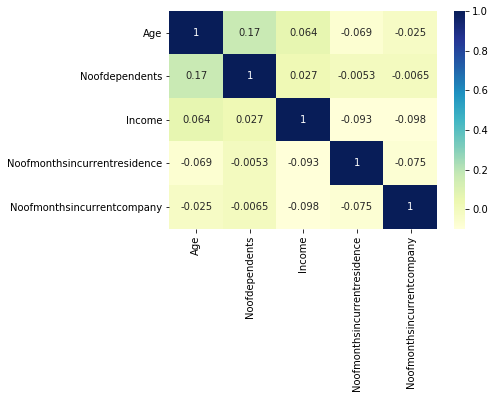

In [38]:
#correlation between various numeric values
sns.heatmap(demodata_num.corr(), cmap="YlGnBu", annot=True)
plt.show()

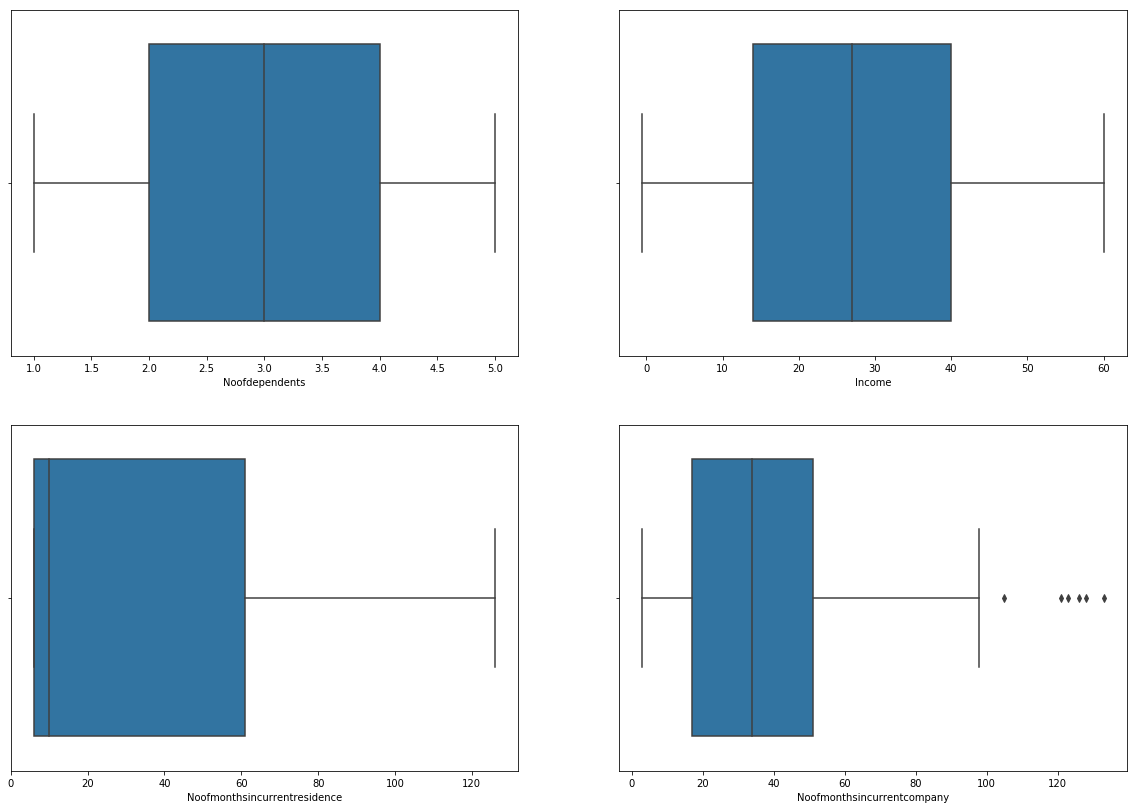

In [39]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=demodata['Noofdependents'])
plt.subplot(2,2,2)
sns.boxplot(x=demodata['Income'])
plt.subplot(2,2,3)
sns.boxplot(x=demodata['Noofmonthsincurrentresidence'])
plt.subplot(2,2,4)
sns.boxplot(x=demodata['Noofmonthsincurrentcompany'])
plt.show()


In [40]:
#Noofmonthsincurrentcompany has some outliers handling that
demodata['Noofmonthsincurrentcompany'] = np.where(demodata['Noofmonthsincurrentcompany']>100,100,demodata['Noofmonthsincurrentcompany'])

In [41]:
#handling income values less than zero and zero
IncomeMean = demodata['Income'].mean()
demodata['Income'] = np.where(demodata['Income']<1,IncomeMean,demodata['Income'])

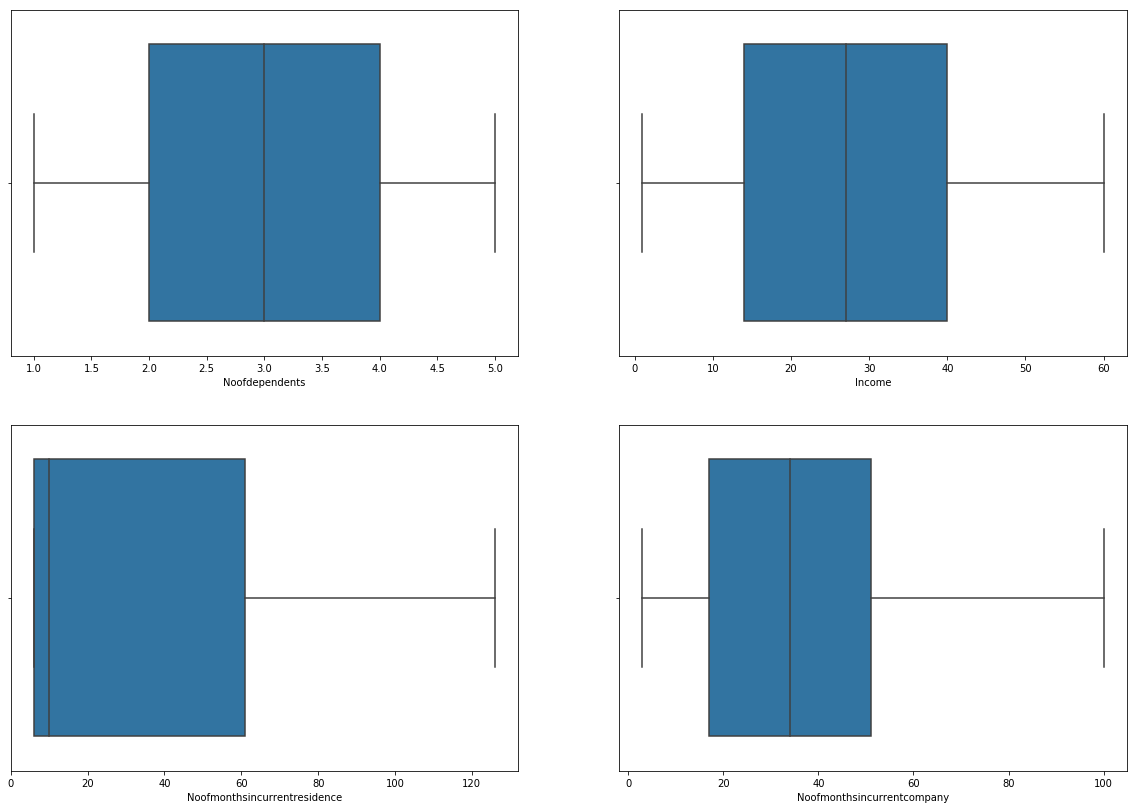

In [42]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=demodata['Noofdependents'])
plt.subplot(2,2,2)
sns.boxplot(x=demodata['Income'])
plt.subplot(2,2,3)
sns.boxplot(x=demodata['Noofmonthsincurrentresidence'])
plt.subplot(2,2,4)
sns.boxplot(x=demodata['Noofmonthsincurrentcompany'])
plt.show()

In [43]:
#cutting Noofmonthsincurrentresidence into bins
demodata['NoofmonthsincurrentresidenceBins'] = pd.cut(demodata['Noofmonthsincurrentresidence'],5)
demodata['NoofmonthsincurrentcompanyBins'] = pd.cut(demodata['Noofmonthsincurrentcompany'],5)

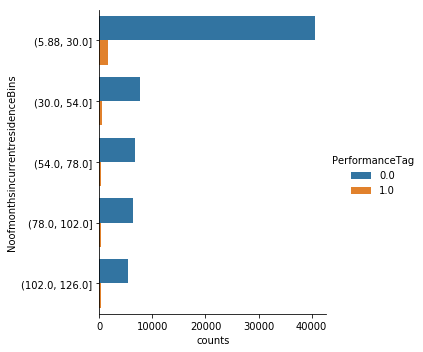

In [44]:
#Plotting Noofdependents purpose against count 
grpby_NoofmonthsincurrentresidenceBins = demodata.groupby(['NoofmonthsincurrentresidenceBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'NoofmonthsincurrentresidenceBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_NoofmonthsincurrentresidenceBins)

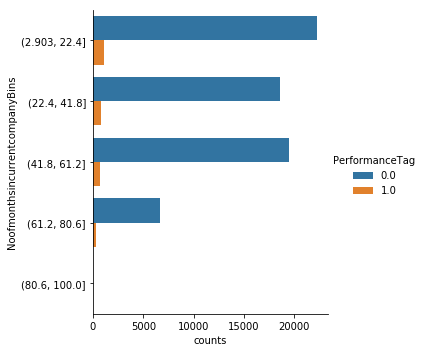

In [45]:
#Plotting Noofdependents purpose against count 
grpby_NoofmonthsincurrentcompanyBins = demodata.groupby(['NoofmonthsincurrentcompanyBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'NoofmonthsincurrentcompanyBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_NoofmonthsincurrentcompanyBins)

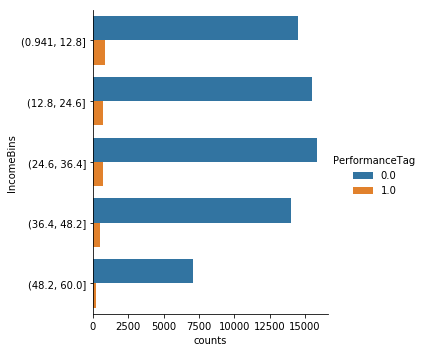

In [46]:
#cutting Noofmonthsincurrentresidence into bins
demodata['IncomeBins'] = pd.cut(demodata['Income'],5)
#Plotting Noofdependents purpose against count 
grpby_IncomeBins = demodata.groupby(['IncomeBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(y= 'IncomeBins', x='counts', hue = 'PerformanceTag', kind="bar", data=grpby_IncomeBins)

In [47]:
#det columns
demodata.columns

Index(['ApplicationID', 'Age', 'Gender', 'MaritalStatus(atthetimeofapplication)', 'Noofdependents', 'Income', 'Education', 'Profession', 'Typeofresidence', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'AgeSegment', 'NoofmonthsincurrentresidenceBins', 'NoofmonthsincurrentcompanyBins', 'IncomeBins'], dtype='object')

In [48]:
#get duplicates from categorical data columns
cols_dup = ['Gender', 'MaritalStatus(atthetimeofapplication)', 'Education', 'Profession', 'Typeofresidence', 'AgeSegment', 'NoofmonthsincurrentresidenceBins', 'NoofmonthsincurrentcompanyBins', 'IncomeBins']

demodata_clean = pd.get_dummies(data=demodata, columns=cols_dup,drop_first=True)
    

In [49]:
#Demodata after cleaning
demodata_clean.head(10)

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0
1,432830445,31,4.0,55.0,112,46,0.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1
2,941387308,32,2.0,46.0,104,49,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
3,392161677,43,1.0,53.0,94,53,0.0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
5,312196805,20,1.0,39.0,116,52,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0
6,532217204,42,2.0,55.0,104,41,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1
7,74788849,34,2.0,49.0,108,40,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1
8,782743811,30,3.0,48.0,115,58,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0
9,96964957,22,1.0,38.0,111,57,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0


In [50]:
#basic check after buidling model
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null uint8
MaritalStatus(atthetimeofapplication)_Single       69870 non-null uint8
Education_Masters                                  69870 non-null uint8
Education_Others                                   69870 non-null uint8
Education_Phd           

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [51]:
#data retained after cleaning 
print("data retained after cleaning demographic data : "+str(demodata_clean.shape[0]/ddata.shape[0]))

data retained after cleaning demographic data : 0.9800126236061435


In [52]:
#perform eda on credit bureau data
check_basic(cdata)

Shape of the Data frame:
(71295, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 71295 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           71295 non-null int64
Nooftimes90DPDorworseinlast6months                      71295 non-null int64
Nooftimes60DPDorworseinlast6months                      71295 non-null int64
Nooftimes30DPDorworseinlast6months                      71295 non-null int64
Nooftimes90DPDorworseinlast12months                     71295 non-null int64
Nooftimes60DPDorworseinlast12months                     71295 non-null int64
Nooftimes30DPDorworseinlast12months                     71295 non-null int64
AvgasCCUtilizationinlast12months                        70237 non-null float64
Nooftradesopenedinlast6months                           71294 non-null float64
Nooftradesopenedinlast12months                          71295 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,7.129500e+04,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,70237.000000,71294.000000,71295.000000,71295.000000,71295.000000,71295.000000,71295.000000,71023.000000,7.102300e+04,71295.000000,71295.000000,69870.000000
mean,4.989601e+08,0.270313,0.430535,0.577207,0.450340,0.655488,0.800912,29.696926,2.298048,5.826888,1.206901,2.397447,1.763532,3.535241,0.256424,1.249163e+06,8.186633,0.084620,0.042193
std,2.885905e+08,0.534166,0.825334,1.074436,0.808387,1.089535,1.331940,29.533308,2.070191,5.065096,1.352936,2.420086,1.971294,3.582199,0.436662,1.278874e+06,7.090776,0.278318,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.483719e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.115320e+05,3.000000,0.000000,0.000000
50%,4.975698e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.749920e+05,6.000000,0.000000,0.000000
75%,7.495868e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,46.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.920796e+06,10.000000,0.000000,0.000000
90%,8.994646e+08,1.000000,2.000000,2.000000,2.000000,2.000000,3.000000,73.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.275863e+06,20.000000,0.000000,0.000000
95%,9.492921e+08,1.000000,2.000000,3.000000,2.000000,3.000000,4.000000,103.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.645896e+06,25.000000,1.000000,0.000000
99%,9.895336e+08,2.000000,3.000000,5.000000,3.000000,5.000000,6.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.249692e+06,31.000000,1.000000,1.000000


In [53]:
#Droping rows with performance tag is null
creditdata = cdata.dropna(axis=0,subset=['PerformanceTag'])

In [54]:
#basic check 
check_basic(creditdata)

Shape of the Data frame:
(69870, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           69870 non-null int64
Nooftimes90DPDorworseinlast6months                      69870 non-null int64
Nooftimes60DPDorworseinlast6months                      69870 non-null int64
Nooftimes30DPDorworseinlast6months                      69870 non-null int64
Nooftimes90DPDorworseinlast12months                     69870 non-null int64
Nooftimes60DPDorworseinlast12months                     69870 non-null int64
Nooftimes30DPDorworseinlast12months                     69870 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           69869 non-null float64
Nooftradesopenedinlast12months                          69870 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,6.987000e+04,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,68847.000000,69869.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69598.000000,6.959800e+04,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,0.248977,0.391685,0.523515,0.414842,0.603406,0.733906,29.265211,2.285105,5.784943,1.189566,2.363461,1.757979,3.525032,0.259648,1.253338e+06,8.174696,0.084872,0.042193
std,2.885519e+08,0.505658,0.771879,1.000757,0.763518,1.021757,1.243183,29.515749,2.081863,5.095342,1.352669,2.423629,1.985014,3.611696,0.438445,1.286166e+06,7.152798,0.278693,0.201030
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,0.000000,0.000000,0.000000
25%,2.485780e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.083912e+05,3.000000,0.000000,0.000000
50%,4.980487e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,4.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.742345e+05,6.000000,0.000000,0.000000
75%,7.498645e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.926224e+06,10.000000,0.000000,0.000000
90%,8.995357e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.282343e+06,20.000000,0.000000,0.000000
95%,9.494121e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,104.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.650667e+06,25.000000,1.000000,0.000000
99%,9.895896e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.250985e+06,31.000000,1.000000,1.000000


In [55]:
#dropping rows with AvgasCCUtilizationinlast12months null
creditdata.dropna(axis=0,subset=['AvgasCCUtilizationinlast12months'],inplace=True)

In [56]:
#basic check
check_basic(creditdata)

Shape of the Data frame:
(68847, 19)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 19 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,29.265211,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,8.292504,0.086133,0.042122
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,29.515749,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,7.137571,0.280562,0.200870
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,104.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,25.000000,1.000000,0.000000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,113.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,31.000000,1.000000,1.000000


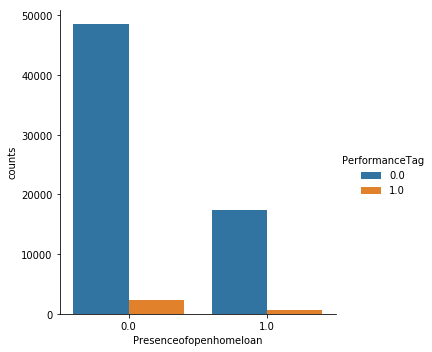

In [57]:

#Plotting Noofdependents purpose against count 
grpby_Presenceofopenhomeloan = creditdata.groupby(['Presenceofopenhomeloan','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Presenceofopenhomeloan', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Presenceofopenhomeloan)

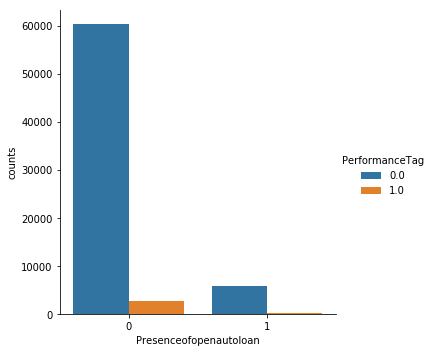

In [58]:

#Plotting Noofdependents purpose against count 
grpby_Presenceofopenautoloan = creditdata.groupby(['Presenceofopenautoloan','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'Presenceofopenautoloan', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_Presenceofopenautoloan)

In [59]:
#credit columns
creditdata.columns

Index(['ApplicationID', 'Nooftimes90DPDorworseinlast6months', 'Nooftimes60DPDorworseinlast6months', 'Nooftimes30DPDorworseinlast6months', 'Nooftimes90DPDorworseinlast12months', 'Nooftimes60DPDorworseinlast12months', 'Nooftimes30DPDorworseinlast12months', 'AvgasCCUtilizationinlast12months', 'Nooftradesopenedinlast6months', 'Nooftradesopenedinlast12months', 'NoofPLtradesopenedinlast6months', 'NoofPLtradesopenedinlast12months', 'NoofInquiriesinlast6months(excludinghome&autoloans)', 'NoofInquiriesinlast12months(excludinghome&autoloans)', 'Presenceofopenhomeloan', 'OutstandingBalance', 'TotalNoofTrades', 'Presenceofopenautoloan', 'PerformanceTag'], dtype='object')

In [60]:
#noof trades fraction
creditdata['FractionOftradesbyTT'] = (creditdata['Nooftradesopenedinlast6months'] + creditdata['Nooftradesopenedinlast12months'])/creditdata['TotalNoofTrades']

In [61]:
#no of pl trades opened fraction
creditdata['FractionOfPLtradesbyTT'] = (creditdata['NoofPLtradesopenedinlast6months'] + creditdata['NoofPLtradesopenedinlast12months'])/creditdata['TotalNoofTrades']

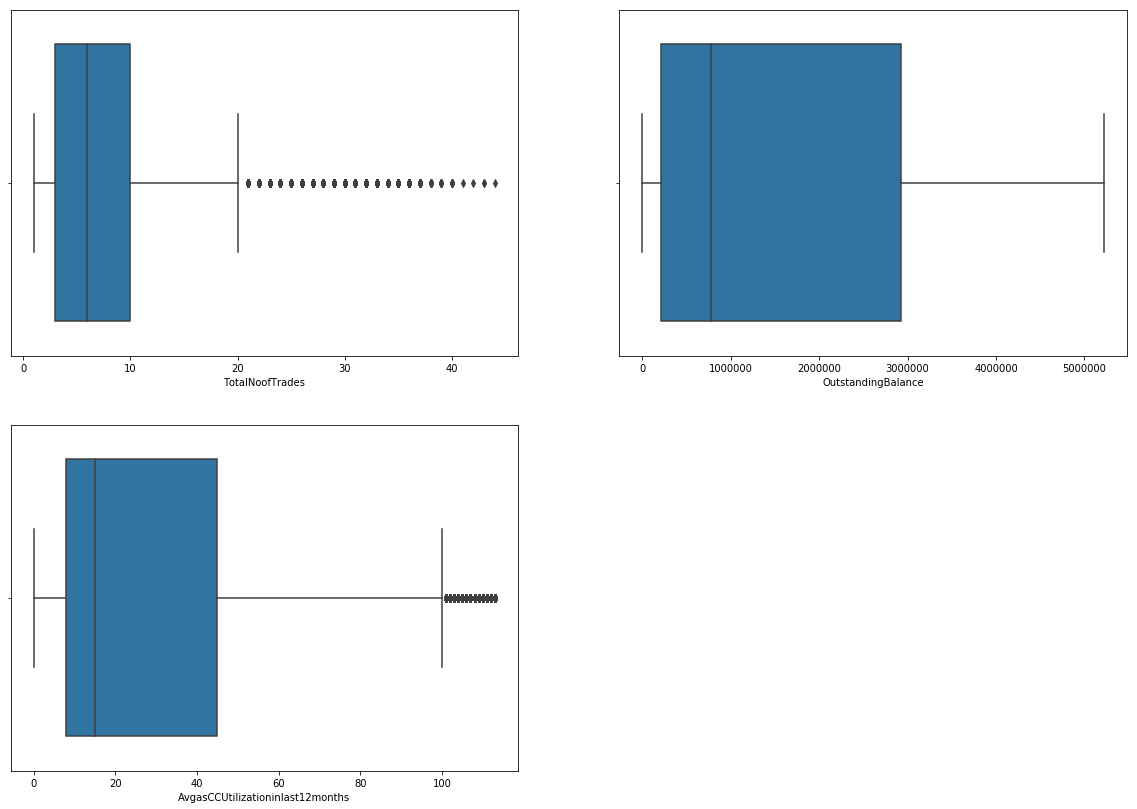

In [62]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=creditdata['TotalNoofTrades'])
plt.subplot(2,2,2)
sns.boxplot(x=creditdata['OutstandingBalance'])
plt.subplot(2,2,3)
sns.boxplot(x=creditdata['AvgasCCUtilizationinlast12months'])
plt.show()

In [63]:
#Handling outliers in TotalNoofTrades & AvgasCCUtilizationinlast12months
creditdata['TotalNoofTrades'] = np.where(creditdata['TotalNoofTrades']>20,20,creditdata['TotalNoofTrades'])
creditdata['AvgasCCUtilizationinlast12months'] = np.where(creditdata['AvgasCCUtilizationinlast12months']>100,100,creditdata['AvgasCCUtilizationinlast12months'])

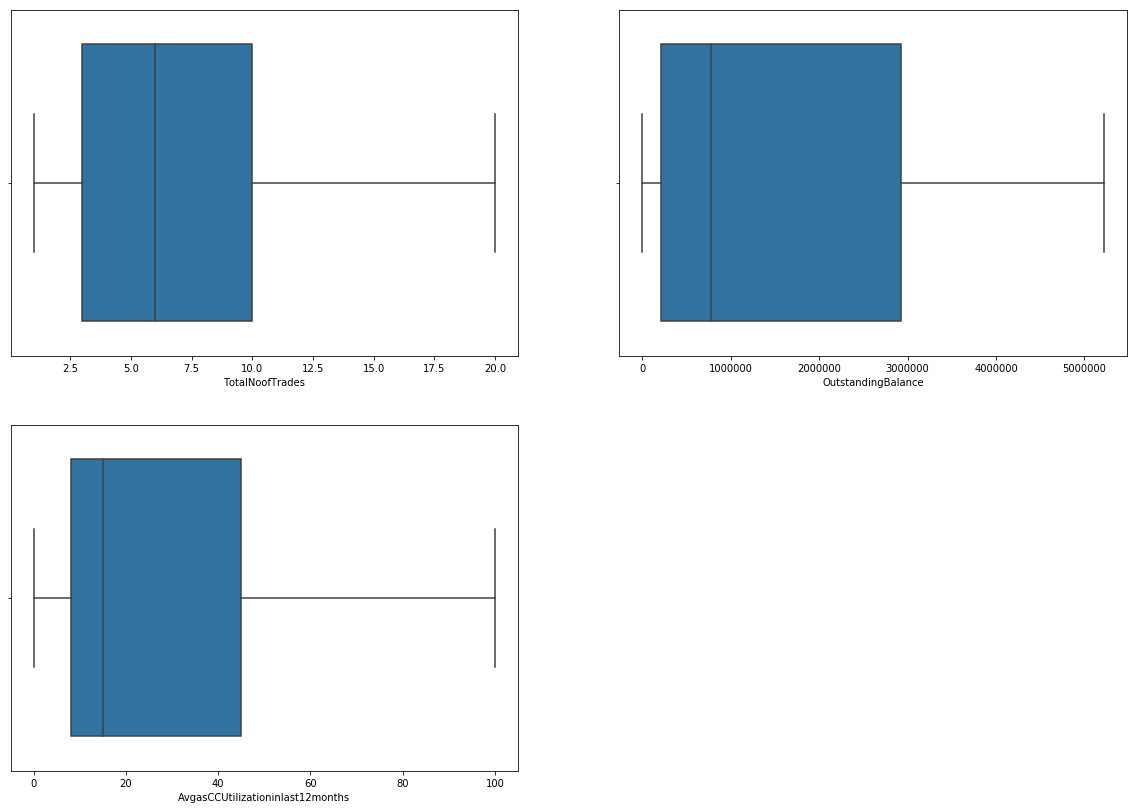

In [64]:
##boxplot after handling 'Age','Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany'
plt.figure(figsize=(20, 14))
plt.subplot(2,2,1)
sns.boxplot(x=creditdata['TotalNoofTrades'])
plt.subplot(2,2,2)
sns.boxplot(x=creditdata['OutstandingBalance'])
plt.subplot(2,2,3)
sns.boxplot(x=creditdata['AvgasCCUtilizationinlast12months'])
plt.show()

In [65]:
#basic check
check_basic(creditdata)

Shape of the Data frame:
(68847, 21)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 21 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000,1.333333,0.750000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,100.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,20.000000,1.000000,0.000000,1.428571,0.800000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,100.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,20.000000,1.000000,1.000000,1.750000,0.909091


In [66]:
#deriving number of dpd in last 6 and 12 months
creditdata['TotalDPDinlast6months'] = creditdata['Nooftimes30DPDorworseinlast6months'] + creditdata['Nooftimes60DPDorworseinlast6months'] + creditdata['Nooftimes90DPDorworseinlast6months']
creditdata['TotalDPDinlast12months'] = creditdata['Nooftimes30DPDorworseinlast12months'] + creditdata['Nooftimes60DPDorworseinlast12months'] + creditdata['Nooftimes90DPDorworseinlast12months']
creditdata['TotalTradesopenedinlast6months'] = creditdata['Nooftradesopenedinlast6months'] + creditdata['NoofPLtradesopenedinlast6months']
creditdata['TotalTradesopenedinlast12months'] = creditdata['Nooftradesopenedinlast12months'] + creditdata['NoofPLtradesopenedinlast12months']

In [67]:
check_basic(creditdata)

Shape of the Data frame:
(68847, 25)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 25 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476,1.178076,1.770854,3.523814,8.263091
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405,2.213789,2.878826,3.330655,7.397558
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000,0.000000,0.000000,1.000000,2.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421,0.000000,0.000000,3.000000,6.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385,2.000000,3.000000,5.000000,13.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.289847e+06,20.000000,0.000000,0.000000,1.333333,0.750000,4.000000,6.000000,8.000000,19.000000
95%,9.494981e+08,1.000000,2.000000,3.000000,2.000000,3.000000,3.000000,100.000000,7.000000,16.000000,4.000000,7.000000,6.000000,11.000000,1.000000,3.653379e+06,20.000000,1.000000,0.000000,1.428571,0.800000,6.000000,8.000000,10.000000,23.000000
99%,9.896704e+08,2.000000,3.000000,4.000000,3.000000,4.000000,5.000000,100.000000,9.000000,21.000000,5.000000,9.000000,8.000000,15.000000,1.000000,4.251365e+06,20.000000,1.000000,1.000000,1.750000,0.909091,9.000000,12.000000,13.000000,29.000000


In [68]:
#creating bins
creditdata['TotalDPDinlast6monthsBins'] = pd.cut(creditdata['TotalDPDinlast6months'],3)
creditdata['TotalDPDinlast12monthsBins'] = pd.cut(creditdata['TotalDPDinlast12months'],5)
creditdata['TotalTradesopenedinlast6monthsBins'] = pd.cut(creditdata['TotalTradesopenedinlast6months'],3)
creditdata['TotalTradesopenedinlast12monthsBins'] = pd.cut(creditdata['TotalTradesopenedinlast12months'],5)


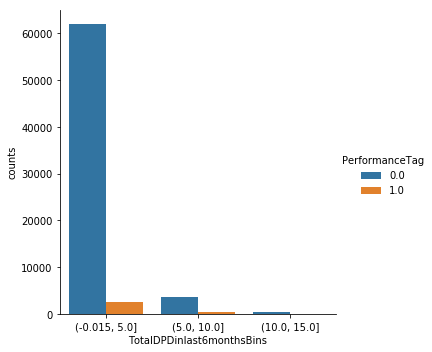

In [69]:
#plotting after creating bins

grpby_TotalDPDinlast6monthsBins = creditdata.groupby(['TotalDPDinlast6monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalDPDinlast6monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalDPDinlast6monthsBins)


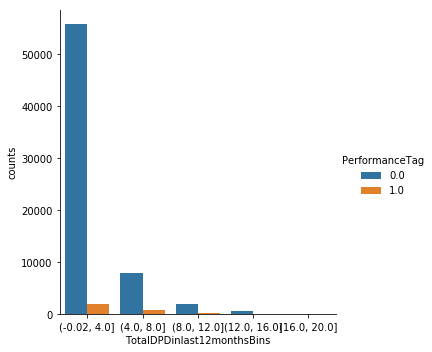

In [70]:
grpby_TotalDPDinlast12monthsBins = creditdata.groupby(['TotalDPDinlast12monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalDPDinlast12monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalDPDinlast12monthsBins)



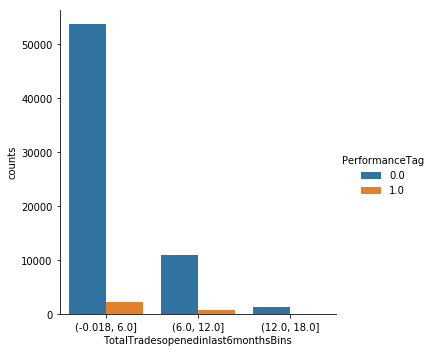

In [71]:
grpby_TotalTradesopenedinlast6monthsBins = creditdata.groupby(['TotalTradesopenedinlast6monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalTradesopenedinlast6monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalTradesopenedinlast6monthsBins)



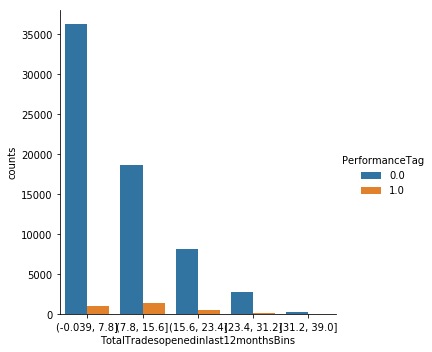

In [72]:
grpby_TotalTradesopenedinlast12monthsBins = creditdata.groupby(['TotalTradesopenedinlast12monthsBins','PerformanceTag']).size().reset_index(name='counts')
sns.catplot(x= 'TotalTradesopenedinlast12monthsBins', y='counts', hue = 'PerformanceTag', kind="bar", data=grpby_TotalTradesopenedinlast12monthsBins)


In [73]:
creditdata.columns

Index(['ApplicationID', 'Nooftimes90DPDorworseinlast6months', 'Nooftimes60DPDorworseinlast6months', 'Nooftimes30DPDorworseinlast6months', 'Nooftimes90DPDorworseinlast12months', 'Nooftimes60DPDorworseinlast12months', 'Nooftimes30DPDorworseinlast12months', 'AvgasCCUtilizationinlast12months', 'Nooftradesopenedinlast6months', 'Nooftradesopenedinlast12months', 'NoofPLtradesopenedinlast6months', 'NoofPLtradesopenedinlast12months', 'NoofInquiriesinlast6months(excludinghome&autoloans)', 'NoofInquiriesinlast12months(excludinghome&autoloans)', 'Presenceofopenhomeloan', 'OutstandingBalance', 'TotalNoofTrades', 'Presenceofopenautoloan', 'PerformanceTag', 'FractionOftradesbyTT', 'FractionOfPLtradesbyTT', 'TotalDPDinlast6months', 'TotalDPDinlast12months', 'TotalTradesopenedinlast6months', 'TotalTradesopenedinlast12months', 'TotalDPDinlast6monthsBins', 'TotalDPDinlast12monthsBins', 'TotalTradesopenedinlast6monthsBins', 'TotalTradesopenedinlast12monthsBins'], dtype='object')

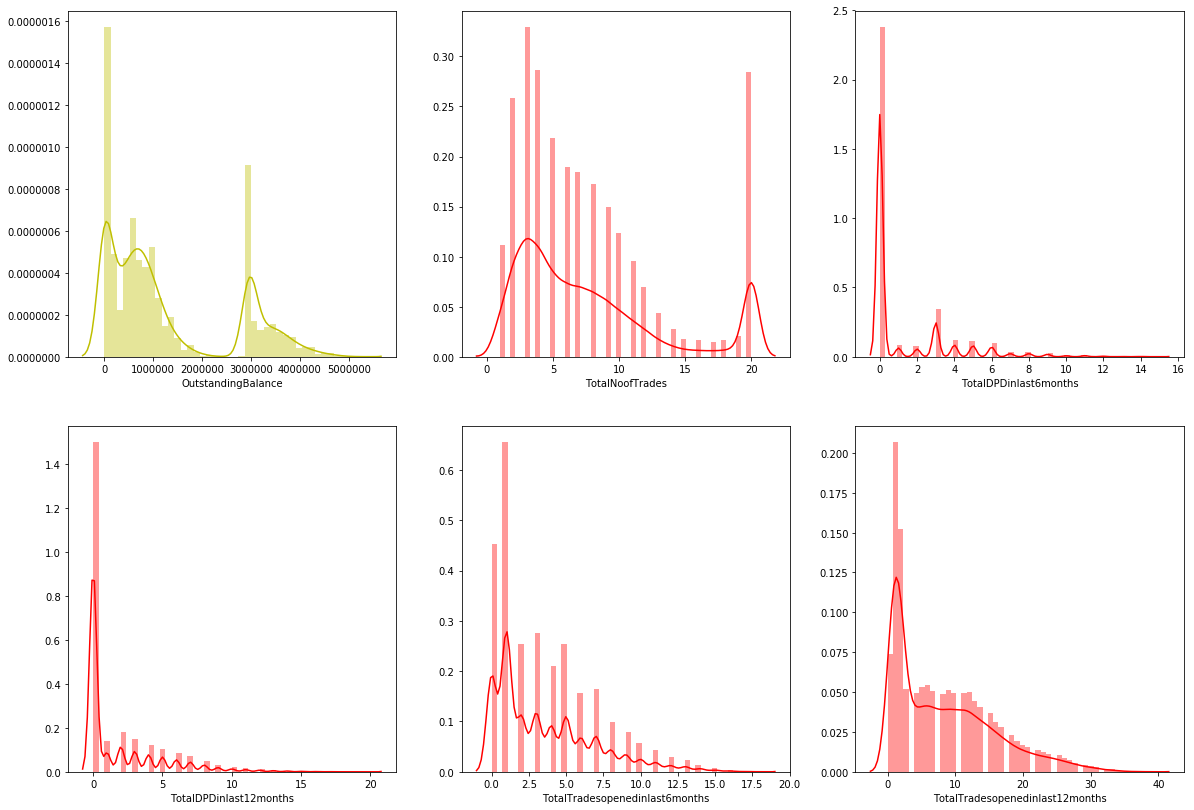

In [74]:
#SCatter plot for 
plt.figure(figsize=(20, 14))
plt.subplot(2,3,1)
sns.distplot(creditdata['OutstandingBalance'], color="y")
plt.subplot(2,3,2)
sns.distplot(creditdata['TotalNoofTrades'], color="r")
plt.subplot(2,3,3)
sns.distplot(creditdata['TotalDPDinlast6months'], color="r")
plt.subplot(2,3,4)
sns.distplot(creditdata['TotalDPDinlast12months'], color="r")
plt.subplot(2,3,5)
sns.distplot(creditdata['TotalTradesopenedinlast6months'], color="r")
plt.subplot(2,3,6)
sns.distplot(creditdata['TotalTradesopenedinlast12months'], color="r")
plt.show()


In [75]:
#get duplicates from categorical data columns
credit_cols_dup = ['TotalDPDinlast6monthsBins', 'TotalDPDinlast12monthsBins', 'TotalTradesopenedinlast6monthsBins', 'TotalTradesopenedinlast12monthsBins']

creditdata_clean = pd.get_dummies(data=creditdata, columns=credit_cols_dup,drop_first=True)
    

In [76]:
check_basic(creditdata_clean)

Shape of the Data frame:
(68847, 37)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68847 entries, 0 to 71294
Data columns (total 37 columns):
ApplicationID                                           68847 non-null int64
Nooftimes90DPDorworseinlast6months                      68847 non-null int64
Nooftimes60DPDorworseinlast6months                      68847 non-null int64
Nooftimes30DPDorworseinlast6months                      68847 non-null int64
Nooftimes90DPDorworseinlast12months                     68847 non-null int64
Nooftimes60DPDorworseinlast12months                     68847 non-null int64
Nooftimes30DPDorworseinlast12months                     68847 non-null int64
AvgasCCUtilizationinlast12months                        68847 non-null float64
Nooftradesopenedinlast6months                           68847 non-null float64
Nooftradesopenedinlast12months                          68847 non-null int64
NoofPLtradesopenedinlast6months                 

,ApplicationID,Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
count,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,6.884700e+04,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000,68847.000000
mean,4.992660e+08,0.252095,0.396328,0.529653,0.419859,0.609511,0.741485,28.629294,2.317603,5.866733,1.206211,2.396357,1.782227,3.568885,0.262364,1.266308e+06,7.696080,0.086133,0.042122,0.930064,0.345476,1.178076,1.770854,3.523814,8.263091,0.058957,0.005679,0.123186,0.031534,0.007248,0.000668,0.169637,0.018345,0.289395,0.124755,0.041861,0.003835
std,2.886467e+08,0.507828,0.774580,1.003865,0.765960,1.024821,1.246772,27.798587,2.078791,5.084671,1.354756,2.424151,1.988652,3.618350,0.439923,1.286538e+06,5.623384,0.280562,0.200870,0.385356,0.302405,2.213789,2.878826,3.330655,7.397558,0.235546,0.075147,0.328653,0.174756,0.084826,0.025840,0.375316,0.134197,0.453485,0.330443,0.200273,0.061806
min,1.004500e+05,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000e+00,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,2.485221e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,8.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,2.134800e+05,3.000000,0.000000,0.000000,0.722222,0.000000,0.000000,0.000000,1.000000,2.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,4.979482e+08,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,15.000000,2.000000,5.000000,1.000000,2.000000,1.000000,3.000000,0.000000,7.779360e+05,6.000000,0.000000,0.000000,1.000000,0.368421,0.000000,0.000000,3.000000,6.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,7.502575e+08,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,45.000000,3.000000,9.000000,2.000000,4.000000,3.000000,5.000000,1.000000,2.930232e+06,10.000000,0.000000,0.000000,1.200000,0.615385,2.000000,3.000000,5.000000,13.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000
90%,8.997148e+08,1.000000,1.000000,2.000000,2.000000,2.000000,3.000000,72.000000,5.000000,13.000000,3.000000,6.000000,5.000000,9.000000,1.000000,3.2

In [77]:
#data retained after cleaning
print("data reatained after cleaning credit data: "+str(creditdata_clean.shape[0]/cdata.shape[0]))

data reatained after cleaning credit data: 0.9656637912897118


In [78]:
#Creating main data with demographic and credit data
maindata = pd.merge(demodata_clean, creditdata_clean, on='ApplicationID')
maindata.head(10)

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag_x,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag_y,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
0,954457215,48,2.0,40.0,113,56,0.0,0,0,0,0,0,0,0,0,0,0,0,1,1,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,4.0,1.0,2,0,0,0,0,1.0,2999395.0,4,0,0.0,0.750000,0.0,0,0,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0
1,432830445,31,4.0,55.0,112,46,0.0,1,0,0,0,0,1,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,0,1,0,0,0,0,0,0,3.0,1.0,2,0,0,0,0,0.0,3078.0,5,0,0.0,0.600000,0.0,0,0,1.0,2,0,0,0,0,0,0,0,0,0,0,0,0
2,941387308,32,2.0,46.0,104,49,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,7.0,0.0,0,0,0,0,0,1.0,3004972.0,2,0,0.0,0.000000,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
3,392161677,43,1.0,53.0,94,53,0.0,1,0,0,0,0,0,1,0,0,0,0,1,1,0,0,0,0,1,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,11.0,1.0,1,0,0,0,0,1.0,3355373.0,4,1,0.0,0.500000,0.0,0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
4,182011211,35,5.0,44.0,112,43,0.0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,12.0,0.0,1,0,0,0,0,1.0,3014283.0,4,0,0.0,0.250000,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
5,312196805,20,1.0,39.0,116,52,0.0,1,0,0,0,0,0,0,0,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,10.0,0.0,0,0,0,0,0,0.0,2569.0,1,0,0.0,0.000000,0.0,0,0,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
6,532217204,42,2.0,55.0,104,41,0.0,1,0,0,0,0,1,0,0,0,0,0,1,1,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,11.0,0.0,1,0,0,0,0,1.0,3005535.0,4,0,0.0,0.250000,0.0,0,0,0.0,1,0,0,0,0,0,0,0,0,0,0,0,0
7,74788849,34,2.0,49.0,108,40,0.0,1,0,1,0,0,0,0,1,0,0,0,1,0,0,0,0,0,0,1,1,0,0,0,0,0,0,1,0,0,0,0,0,0,13.0,1.0,1,0,0,0,0,1.0,3004790.0,3,0,0.0,0.666667,0.0,0,0,1.0,1,0,0,0,0,0,0,0,0,0,0,0,0
8,782743811,30,3.0,48.0,115,58,0.0,1,0,0,0,1,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,1,9.0,0.0,0,0,0,0,0,1.0,3007428.0,2,0,0.0,0.000000,0.0,0,1,0.0,0,0,0,0,0,0,0,0,0,0,0,0,0
9,96964957,22,1.0,38.0,111,57,0.0,1,1,0,0,0,0,0,1,0,0,0,1,0,0,1,0,0,0,1,0,1,0,0,0,0,1,0,0,0,0,0,0,0,6.0,1.0,1,0,0,

In [79]:
#Basic check on main data
check_basic(maindata)

Shape of the Data frame:
(68853, 70)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68853 entries, 0 to 68852
Data columns (total 70 columns):
ApplicationID                                           68853 non-null int64
Age                                                     68853 non-null int64
Noofdependents                                          68850 non-null float64
Income                                                  68853 non-null float64
Noofmonthsincurrentresidence                            68853 non-null int64
Noofmonthsincurrentcompany                              68853 non-null int64
PerformanceTag_x                                        68853 non-null float64
Gender_M                                                68853 non-null uint8
MaritalStatus(atthetimeofapplication)_Single            68853 non-null uint8
Education_Masters                                       68853 non-null uint8
Education_Others                              

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag_x,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag_y,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
count,6.885300e+04,68853.000000,68850.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.00000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.00000,68853.000000,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000
mean,4.992832e+08,44.807793,2.858954,27.430168,34.645389,34.246729,0.042133,0.763816,0.147938,0.336020,0.001670,0.063948,0.350878,0.199367,0.232568,0.025446,0.002847,0.200558,0.74813,0.495766,0.320465,0.005708,0.117134,0.100780,0.095406,0.081492,0.277141,0.288077,0.101404,0.000145,0.232539,0.236446,0.207311,0.104411,0.252102,0.396352,0.529694,0.419880,0.609545,0.741536,28.630808,2.317532,5.866556,1.206149,2.396323,1.782203,3.56885,0.262342,1.266234e+06,7.695859,0.086140,0.042133,0.930061,0.345481,1.178148,1.770961,3.523681,8.262879,0.058966,0.005679,0.123219,0.031531,0.007247,0.000668,0.169622,0.018343,0.289414,0.124744,0.041857,0.003834
std,2.886404e+08,9.555276,1.385301,15.429335,36.836357,20.344231,0.200895,0.424740,0.355041,0.472349,0.040835,0.244662,0.477248,0.399527,0.422472,0.157475,0.053278,0.400421,0.43409,0.499986,0.466659,0.075335,0.321582,0.301039,0.293777,0.273592

In [80]:
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null uint8
MaritalStatus(atthetimeofapplication)_Single       69870 non-null uint8
Education_Masters                                  69870 non-null uint8
Education_Others                                   69870 non-null uint8
Education_Phd           

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [81]:
demodata_clean.columns

Index(['ApplicationID', 'Age', 'Noofdependents', 'Income', 'Noofmonthsincurrentresidence', 'Noofmonthsincurrentcompany', 'PerformanceTag', 'Gender_M', 'MaritalStatus(atthetimeofapplication)_Single', 'Education_Masters', 'Education_Others', 'Education_Phd', 'Education_Professional', 'Profession_SE', 'Profession_SE_PROF', 'Typeofresidence_Living with Parents', 'Typeofresidence_Others', 'Typeofresidence_Owned', 'Typeofresidence_Rented', 'AgeSegment_PostMiddleAge', 'AgeSegment_Retired', 'AgeSegment_Youth', 'NoofmonthsincurrentresidenceBins_(30.0, 54.0]', 'NoofmonthsincurrentresidenceBins_(54.0, 78.0]', 'NoofmonthsincurrentresidenceBins_(78.0, 102.0]', 'NoofmonthsincurrentresidenceBins_(102.0, 126.0]', 'NoofmonthsincurrentcompanyBins_(22.4, 41.8]', 'NoofmonthsincurrentcompanyBins_(41.8, 61.2]', 'NoofmonthsincurrentcompanyBins_(61.2, 80.6]', 'NoofmonthsincurrentcompanyBins_(80.6, 100.0]', 'IncomeBins_(12.8, 24.6]', 'IncomeBins_(24.6, 36.4]', 'IncomeBins_(36.4, 48.2]',
       'IncomeBins_(48.

In [82]:
unitcols =  ['Gender_M', 'MaritalStatus(atthetimeofapplication)_Single', 'Education_Masters', 'Education_Others', 'Education_Phd', 'Education_Professional', 'Profession_SE', 'Profession_SE_PROF', 'Typeofresidence_Living with Parents', 'Typeofresidence_Others', 'Typeofresidence_Owned', 'Typeofresidence_Rented', 'AgeSegment_PostMiddleAge', 'AgeSegment_Retired', 'AgeSegment_Youth', 'NoofmonthsincurrentresidenceBins_(30.0, 54.0]', 'NoofmonthsincurrentresidenceBins_(54.0, 78.0]', 'NoofmonthsincurrentresidenceBins_(78.0, 102.0]', 'NoofmonthsincurrentresidenceBins_(102.0, 126.0]', 'NoofmonthsincurrentcompanyBins_(22.4, 41.8]', 'NoofmonthsincurrentcompanyBins_(41.8, 61.2]', 'NoofmonthsincurrentcompanyBins_(61.2, 80.6]', 'NoofmonthsincurrentcompanyBins_(80.6, 100.0]', 'IncomeBins_(12.8, 24.6]', 'IncomeBins_(24.6, 36.4]', 'IncomeBins_(36.4, 48.2]',
       'IncomeBins_(48.2, 60.0]']
for c in unitcols:
    demodata_clean[c] = demodata_clean[c].astype('float64',inplace=True)

In [83]:
check_basic(demodata_clean)

Shape of the Data frame:
(69870, 34)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 69870 entries, 0 to 71294
Data columns (total 34 columns):
ApplicationID                                      69870 non-null int64
Age                                                69870 non-null int64
Noofdependents                                     69867 non-null float64
Income                                             69870 non-null float64
Noofmonthsincurrentresidence                       69870 non-null int64
Noofmonthsincurrentcompany                         69870 non-null int64
PerformanceTag                                     69870 non-null float64
Gender_M                                           69870 non-null float64
MaritalStatus(atthetimeofapplication)_Single       69870 non-null float64
Education_Masters                                  69870 non-null float64
Education_Others                                   69870 non-null float64
Education_Phd   

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,6.987000e+04,69870.000000,69867.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.000000,69870.00000,69870.000000,69870.000000,69870.000000
mean,4.992264e+08,44.795649,2.859562,27.451005,34.608144,34.197238,0.042193,0.763733,0.147660,0.336067,0.001703,0.063890,0.350708,0.199327,0.232661,0.025447,0.002834,0.200415,0.748361,0.495706,0.320195,0.005839,0.116631,0.100358,0.095406,0.081580,0.276571,0.288636,0.100515,0.000143,0.23206,0.236339,0.207628,0.104752
std,2.885519e+08,9.557157,1.385554,15.437692,36.845655,20.342683,0.201030,0.424791,0.354765,0.472365,0.041235,0.244559,0.477195,0.399497,0.422531,0.157480,0.053159,0.400314,0.433958,0.499985,0.466555,0.076193,0.320982,0.300479,0.293777,0.273726,0.447306,0.453132,0.300688,0.011963,0.42215,0.424836,0.405612,0.306235
min,1.004500e+05,15.000000,1.000000,1.000000,6.000000,3.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
25%,2.485780e+08,37.000000,2.000000,14.000000,6.000000,17.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
50%,4.980487e+08,45.000000,3.000000,27.000000,10.000000,34.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
75%,7.498645e+08,53.000000,4.000000,40.000000,61.000000,51.000000,0.000000,1.000000,0.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,0.000000,0.000000,0.00000,0.000000,0.000000,0.000000
90%,8.995357e+08,58.000000,5.000000,49.000000,98.000000,62.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
95%,9.494121e+08,60.000000,5.000000,54.000000,110.000000,68.000000,0.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,0.000000,1.00000,1.000000,1.000000,1.000000
99%,9.895896e+08,60.000000,5.000000,59.000000,122.000000,74.000000,1.000000,1.000000,1.000000,1.0000

In [84]:
#test train split building model demo graphic data
Y = demodata_clean.loc[:,'PerformanceTag']
X = demodata_clean.loc[:,demodata_clean.columns != 'PerformanceTag']
X.drop(['ApplicationID'], axis=1, inplace=True)
colsX = X.columns
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = colsX
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, 
                                                    random_state = 40)

In [85]:
check_basic(X_train)

Shape of the Data frame:
(48909, 32)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48909 entries, 29982 to 11590
Data columns (total 32 columns):
Age                                                48909 non-null float64
Noofdependents                                     48906 non-null float64
Income                                             48909 non-null float64
Noofmonthsincurrentresidence                       48909 non-null float64
Noofmonthsincurrentcompany                         48909 non-null float64
Gender_M                                           48909 non-null float64
MaritalStatus(atthetimeofapplication)_Single       48909 non-null float64
Education_Masters                                  48909 non-null float64
Education_Others                                   48909 non-null float64
Education_Phd                                      48909 non-null float64
Education_Professional                             48909 non-null float64
Prof

,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]"
count,48909.000000,48906.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000,48909.000000
mean,0.001569,0.002557,0.000568,-0.001265,0.004720,-0.000116,-0.001147,0.000316,-0.000149,0.001856,0.000523,0.004662,0.000426,0.000571,-0.004462,-0.000158,0.001621,0.002638,-0.000675,0.000644,-0.005370,0.006097,-0.002589,-0.001494,-0.003053,0.004742,0.003257,-0.001709,-0.000232,0.000910,0.001265,-0.001155
std,0.998130,1.001447,0.999421,0.999519,1.000233,1.000082,0.998870,1.000120,0.998211,1.003313,1.000174,1.003502,1.000280,1.001730,0.957362,0.999892,0.999081,1.000029,0.999750,1.004178,0.993561,1.008068,0.996435,0.997723,0.998479,1.002209,1.004323,0.925839,0.999863,1.000574,1.000921,0.998518
min,-3.117649,-1.342116,-1.713416,-0.776437,-1.533596,-1.797914,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,-1.724515,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
25%,-0.711058,-0.620378,-0.871316,-0.776437,-0.845383,0.556200,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,-1.724515,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
50%,0.021382,0.101360,-0.029215,-0.667876,-0.009696,0.556200,-0.416222,-0.711460,-0.041305,-0.261248,-0.734942,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,0.579873,-0.991449,-0.686301,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,-0.618308,-0.636985,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
75%,0.858457,0.823098,0.812886,0.716286,0.825991,0.556200,-0.416222,1.405559,-0.041305,-0.261248,1.360651,-0.498949,-0.550640,-0.161591,-0.053309,-0.500648,0.579873,1.008625,1.457086,-0.076640,-0.363359,-0.333996,-0.324758,-0.298038,1.617316,1.569895,-0.334287,-0.011964,-0.549713,-0.556311,-0.511893,-0.342065
90%,1.381629,1.544835,1.395879,1.720483,1.366730,0.556200,2.402565,1.405559,-0.041305,-0.261248,1.360651,2.004214,1.816069,-0.161591,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,-0.324758,-0.298038,1.617316,1.569895,2.991444,-0.011964,1.819131,1.797557,1.953534,2.923420
95%,1.590898,1.544835,1.719764,2.046168,1.661679,0.556200,2.402565,1.405559,-0.041305,3.827778,1.360651,2.004214,1.816069,-0.161591,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,3.079212,3.355279,1.617316,1.569895,2.991444,-0.011964,1.819131,1.797557,1.953534,2.923420
99%,1.590898,1.544835,2.043649,2.371853,1.956627,0.556200,2.402565,1.405559,-0.041305,3.827778,1.360651,2.004214,1.816069,6.188454,-0.053309,1.997410,0.579873,1.008625,1.457086,-0.076640,2.752101,2.994052,3.079212

In [86]:
X_train['Noofdependents'].fillna(X_train['Noofdependents'].mean(), inplace=True)

In [87]:
pca = PCA(svd_solver='randomized', random_state=42)

pca.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

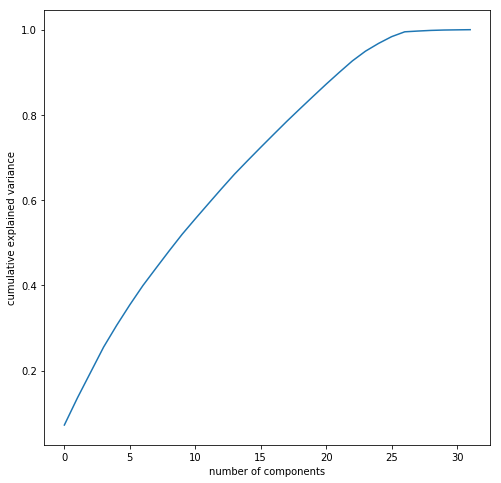

In [88]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [89]:
pca_final = IncrementalPCA(n_components=25)
df_train_pca = pca_final.fit_transform(X_train)

In [90]:
df_test_pca = pca_final.transform(X_test)

In [91]:
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)

In [92]:
# Predicted probabilities
y_pred = model_pca.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)

In [93]:
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))

Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20073
         1.0       0.00      0.00      0.00       888

    accuracy                           0.96     20961
   macro avg       0.48      0.50      0.49     20961
weighted avg       0.92      0.96      0.94     20961

accuracy : 0.9576356089881208
precision_score : 0.0
recall_score : 0.0


In [94]:
#Decision tree
from sklearn.tree import DecisionTreeClassifier
from sklearn import tree

dt1 = DecisionTreeClassifier(max_depth=5)
dt1.fit(df_train_pca, y_train)

DecisionTreeClassifier(class_weight=None, criterion='gini', max_depth=5,
                       max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort=False,
                       random_state=None, splitter='best')

In [95]:
# Predicted probabilities
y_pred = dt1.predict(df_test_pca)
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))


Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     20073
         1.0       0.00      0.00      0.00       888

    accuracy                           0.96     20961
   macro avg       0.48      0.50      0.49     20961
weighted avg       0.92      0.96      0.94     20961

accuracy : 0.9573016554553695
precision_score : 0.0
recall_score : 0.0


In [96]:
#building model for main data(credit + demographic data)
check_basic(maindata)

Shape of the Data frame:
(68853, 70)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 68853 entries, 0 to 68852
Data columns (total 70 columns):
ApplicationID                                           68853 non-null int64
Age                                                     68853 non-null int64
Noofdependents                                          68850 non-null float64
Income                                                  68853 non-null float64
Noofmonthsincurrentresidence                            68853 non-null int64
Noofmonthsincurrentcompany                              68853 non-null int64
PerformanceTag_x                                        68853 non-null float64
Gender_M                                                68853 non-null uint8
MaritalStatus(atthetimeofapplication)_Single            68853 non-null uint8
Education_Masters                                       68853 non-null uint8
Education_Others                              

,ApplicationID,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,PerformanceTag_x,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,PerformanceTag_y,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
count,6.885300e+04,68853.000000,68850.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.00000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.00000,68853.000000,6.885300e+04,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000,68853.000000
mean,4.992832e+08,44.807793,2.858954,27.430168,34.645389,34.246729,0.042133,0.763816,0.147938,0.336020,0.001670,0.063948,0.350878,0.199367,0.232568,0.025446,0.002847,0.200558,0.74813,0.495766,0.320465,0.005708,0.117134,0.100780,0.095406,0.081492,0.277141,0.288077,0.101404,0.000145,0.232539,0.236446,0.207311,0.104411,0.252102,0.396352,0.529694,0.419880,0.609545,0.741536,28.630808,2.317532,5.866556,1.206149,2.396323,1.782203,3.56885,0.262342,1.266234e+06,7.695859,0.086140,0.042133,0.930061,0.345481,1.178148,1.770961,3.523681,8.262879,0.058966,0.005679,0.123219,0.031531,0.007247,0.000668,0.169622,0.018343,0.289414,0.124744,0.041857,0.003834
std,2.886404e+08,9.555276,1.385301,15.429335,36.836357,20.344231,0.200895,0.424740,0.355041,0.472349,0.040835,0.244662,0.477248,0.399527,0.422472,0.157475,0.053278,0.400421,0.43409,0.499986,0.466659,0.075335,0.321582,0.301039,0.293777,0.273592

In [97]:
#test train split building model demo graphic data
Y = maindata.loc[:,'PerformanceTag_x']
X = maindata.loc[:,maindata.columns != 'PerformanceTag_x']
X.drop(['ApplicationID','PerformanceTag_y'], axis=1, inplace=True)
colsX = X.columns
scaler = StandardScaler().fit(X)
X = scaler.transform(X)
X = pd.DataFrame(X)
X.columns = colsX
# split
X_train, X_test, y_train, y_test = train_test_split(X, Y, 
                                                    test_size = 0.3, 
                                                    random_state = 40)

In [98]:
check_basic(X_train)

Shape of the Data frame:
(48197, 67)


Basic info of the Data frame:
<class 'pandas.core.frame.DataFrame'>
Int64Index: 48197 entries, 42018 to 11590
Data columns (total 67 columns):
Age                                                     48197 non-null float64
Noofdependents                                          48194 non-null float64
Income                                                  48197 non-null float64
Noofmonthsincurrentresidence                            48197 non-null float64
Noofmonthsincurrentcompany                              48197 non-null float64
Gender_M                                                48197 non-null float64
MaritalStatus(atthetimeofapplication)_Single            48197 non-null float64
Education_Masters                                       48197 non-null float64
Education_Others                                        48197 non-null float64
Education_Phd                                           48197 non-null float64
Education_Professional      

,Age,Noofdependents,Income,Noofmonthsincurrentresidence,Noofmonthsincurrentcompany,Gender_M,MaritalStatus(atthetimeofapplication)_Single,Education_Masters,Education_Others,Education_Phd,Education_Professional,Profession_SE,Profession_SE_PROF,Typeofresidence_Living with Parents,Typeofresidence_Others,Typeofresidence_Owned,Typeofresidence_Rented,AgeSegment_PostMiddleAge,AgeSegment_Retired,AgeSegment_Youth,"NoofmonthsincurrentresidenceBins_(30.0, 54.0]","NoofmonthsincurrentresidenceBins_(54.0, 78.0]","NoofmonthsincurrentresidenceBins_(78.0, 102.0]","NoofmonthsincurrentresidenceBins_(102.0, 126.0]","NoofmonthsincurrentcompanyBins_(22.4, 41.8]","NoofmonthsincurrentcompanyBins_(41.8, 61.2]","NoofmonthsincurrentcompanyBins_(61.2, 80.6]","NoofmonthsincurrentcompanyBins_(80.6, 100.0]","IncomeBins_(12.8, 24.6]","IncomeBins_(24.6, 36.4]","IncomeBins_(36.4, 48.2]","IncomeBins_(48.2, 60.0]",Nooftimes90DPDorworseinlast6months,Nooftimes60DPDorworseinlast6months,Nooftimes30DPDorworseinlast6months,Nooftimes90DPDorworseinlast12months,Nooftimes60DPDorworseinlast12months,Nooftimes30DPDorworseinlast12months,AvgasCCUtilizationinlast12months,Nooftradesopenedinlast6months,Nooftradesopenedinlast12months,NoofPLtradesopenedinlast6months,NoofPLtradesopenedinlast12months,NoofInquiriesinlast6months(excludinghome&autoloans),NoofInquiriesinlast12months(excludinghome&autoloans),Presenceofopenhomeloan,OutstandingBalance,TotalNoofTrades,Presenceofopenautoloan,FractionOftradesbyTT,FractionOfPLtradesbyTT,TotalDPDinlast6months,TotalDPDinlast12months,TotalTradesopenedinlast6months,TotalTradesopenedinlast12months,"TotalDPDinlast6monthsBins_(5.0, 10.0]","TotalDPDinlast6monthsBins_(10.0, 15.0]","TotalDPDinlast12monthsBins_(4.0, 8.0]","TotalDPDinlast12monthsBins_(8.0, 12.0]","TotalDPDinlast12monthsBins_(12.0, 16.0]","TotalDPDinlast12monthsBins_(16.0, 20.0]","TotalTradesopenedinlast6monthsBins_(6.0, 12.0]","TotalTradesopenedinlast6monthsBins_(12.0, 18.0]","TotalTradesopenedinlast12monthsBins_(7.8, 15.6]","TotalTradesopenedinlast12monthsBins_(15.6, 23.4]","TotalTradesopenedinlast12monthsBins_(23.4, 31.2]","TotalTradesopenedinlast12monthsBins_(31.2, 39.0]"
count,48197.000000,48194.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000,48197.000000
mean,-0.000031,0.006105,-0.000354,-0.003016,-0.003044,-0.004867,0.001041,-0.000798,-0.000254,0.003469,0.002380,-0.000617,-0.004817,0.000738,-0.003583,0.001488,-0.001894,0.001392,0.000246,0.000523,0.002098,-0.001398,-0.001433,-0.001948,0.000632,-0.003687,0.000386,0.005165,-0.001850,-0.002880,0.000779,0.001270,-0.003455,-0.003829,-0.004808,-0.003385,-0.002819,-0.003991,-0.004928,-0.001588,-0.002091,-0.000946,-0.002992,-0.000322,-0.001565,0.003817,0.002502,-0.000330,-0.001308,-0.007574,-0.005801,-0.004313,-0.003633,-0.001376,-0.002418,-0.003699,-0.002954,0.001023,-0.001745,-0.002030,-0.004175,0.000040,0.001067,-0.004752,0.001363,-0.000663,0.001074
std,0.999671,0.998360,1.002000,0.998721,1.001062,1.003017,1.001042,0.999733,0.996906,1.006168,1.000751,0.999546,0.996945,1.002232,0.965994,1.001122,1.001091,1.000021,1.000105,1.003439,1.002503,0.998153,0.998034,0.997024,1.000325,0.998277,1.000519,1.195205,0.998836,0.998218,1.000572,1.001651,0.997034,0.996421,0.993209,0.

In [99]:
X_train['Noofdependents'].fillna(X_train['Noofdependents'].mean(), inplace=True)

In [100]:
pca_credit_demo = PCA(svd_solver='randomized', random_state=42)

pca_credit_demo.fit(X_train)

PCA(copy=True, iterated_power='auto', n_components=None, random_state=42,
    svd_solver='randomized', tol=0.0, whiten=False)

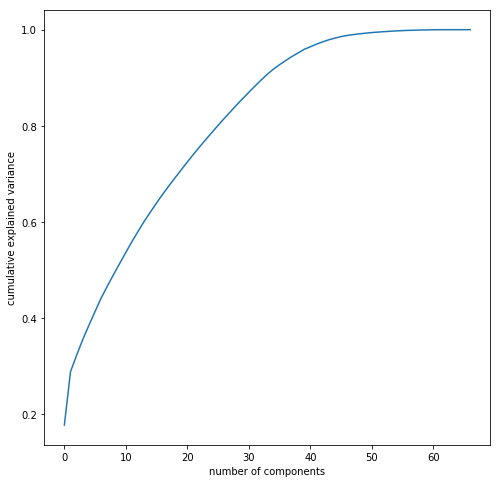

In [101]:
#Making the screeplot - plotting the cumulative variance against the number of components
%matplotlib inline
fig = plt.figure(figsize = (8,8))
plt.plot(np.cumsum(pca_credit_demo.explained_variance_ratio_))
plt.xlabel('number of components')
plt.ylabel('cumulative explained variance')
plt.show()

In [102]:
pca_final = IncrementalPCA(n_components=25)
df_train_pca = pca_credit_demo.fit_transform(X_train)
df_test_pca = pca_credit_demo.transform(X_test)
learner_pca = LogisticRegression()
model_pca = learner_pca.fit(df_train_pca,y_train)
# Predicted probabilities
y_pred = model_pca.predict(df_test_pca)

# Converting y_pred to a dataframe which is an array
y_pred_df = pd.DataFrame(y_pred)
#confusion_matrix = confusion_matrix(y_test, y_pred)
#print(confusion_matrix)
print("results for main data credit+demo")
print("Classification report")
print(classification_report(y_test, y_pred))
print("accuracy : " + str(accuracy_score(y_test, y_pred)))
print("precision_score : " + str(precision_score(y_test, y_pred)))
print("recall_score : " +str(recall_score(y_test, y_pred)))

results for main data credit+demo
Classification report
              precision    recall  f1-score   support

         0.0       0.96      1.00      0.98     19801
         1.0       0.00      0.00      0.00       855

    accuracy                           0.96     20656
   macro avg       0.48      0.50      0.49     20656
weighted avg       0.92      0.96      0.94     20656

accuracy : 0.9586076684740511
precision_score : 0.0
recall_score : 0.0
